In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\OM RAJ PANDEY\Desktop\census-income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Value Count Function

In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

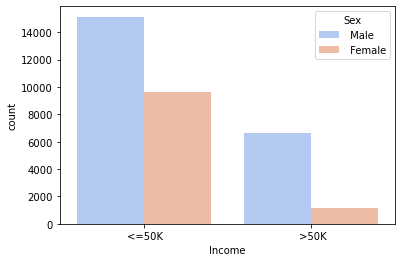

In [15]:
sns.countplot(df['Income'],palette='coolwarm',hue='Sex',data=df)

# Filling ? values

In [16]:
#replace the values with mode
df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','Prof-speciality')
df['Native_country']=df['Native_country'].replace('?','United-States')

In [17]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Feature Engineering

In [18]:
df.Education=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.Education=df.Education.replace('HS-grad','high school')
df.Education=df.Education.replace(['Assoc-voc','Assoc-acdm','prof-school','some-college'],'higher')
df.Education=df.Education.replace('Bachelors','undergrad')
df.Education=df.Education.replace('Masters','grad')
df.Education=df.Education.replace('Doctorate','doc')

In [19]:
#Marital_status
df['Marital_status']=df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['Marital_status']=df['Marital_status'].replace(['Never-married'],'not-married')
df['Marital_status']=df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [20]:
#Income
df.Income=df.Income.replace('<=50k',0)
df.Income=df.Income.replace('>50k',1)

In [21]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [22]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [23]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


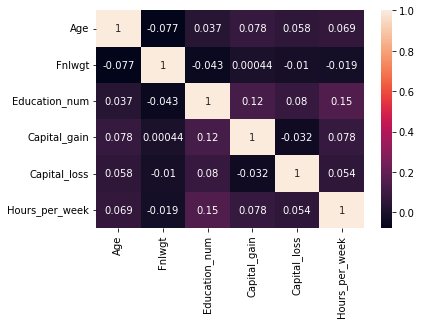

In [24]:
sns.heatmap(df.corr(), annot=True);

# Histogram

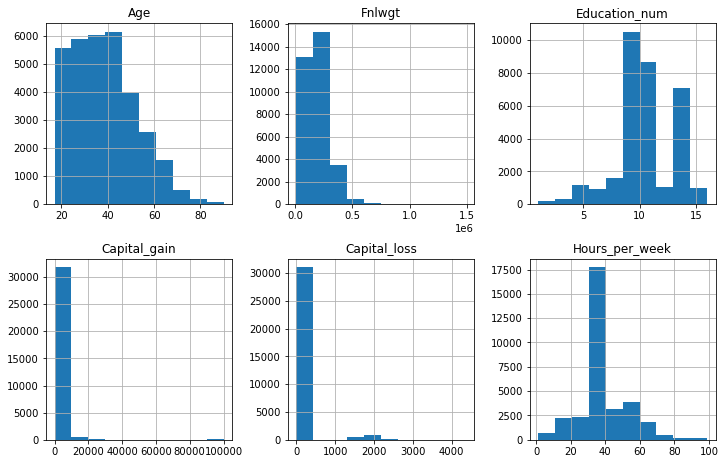

In [25]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

In [26]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [27]:
#making the skew less than or equal to 0.55 for better prediction and plotting normal distribution
skew=('Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# BoxPlot

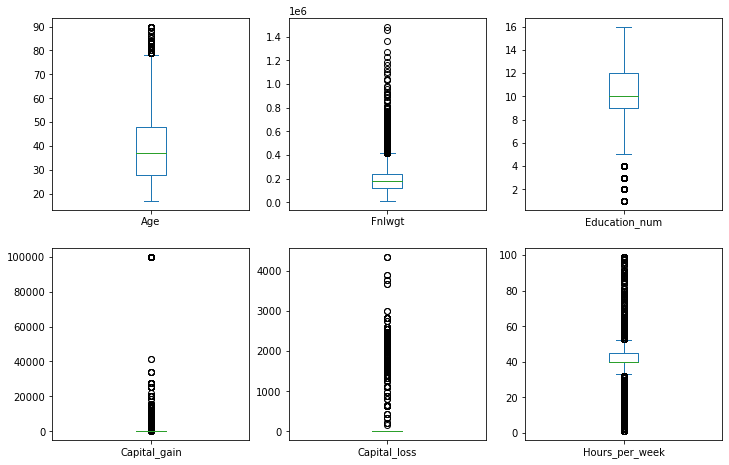

In [94]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True );

# Plotly

In [95]:
px.pie(df, values='Education_num', names='Education', title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

<AxesSubplot:xlabel='Race', ylabel='count'>

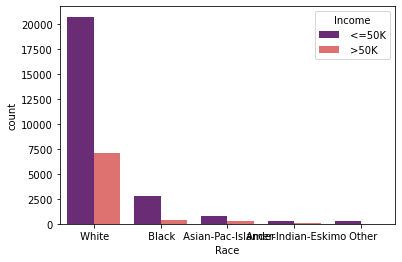

In [96]:
sns.countplot(df['Race'], hue='Income', data=df, palette='magma')

# Model Building

In [97]:
x=df.drop(['Income'], axis=1)
y=df['Income']

In [98]:
##Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [100]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [101]:
ss=StandardScaler().fit(df1.drop('Income', axis=1))
x=ss.transform(df1.drop('Income', axis=1))
y=df['Income']

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=40)

In [103]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [104]:
print("lr classification score", lr.score(x_train, y_train))
print("dt classification score", dt.score(x_train, y_train))
print("rf classification score", rf.score(x_train, y_train))
print("adb classification score", adb.score(x_train, y_train))

lr classification score 0.8235345735345735
dt classification score 0.999956124956125
rf classification score 0.999956124956125
adb classification score 0.8608283608283608


# Model Evaluation:

In [105]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [106]:
#Using confusion matrix in order to evaluate the model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[6983  429]
 [1276 1080]]


In [107]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[6480  932]
 [ 877 1479]]


In [108]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[6920  492]
 [ 880 1476]]


In [109]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[6987  425]
 [ 923 1433]]


# checking classification report for each model

In [111]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7412
        >50K       0.72      0.46      0.56      2356

    accuracy                           0.83      9768
   macro avg       0.78      0.70      0.73      9768
weighted avg       0.81      0.83      0.81      9768



In [112]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7412
        >50K       0.61      0.63      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.75      0.75      0.75      9768
weighted avg       0.82      0.81      0.82      9768



In [113]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7412
        >50K       0.75      0.63      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.85      0.86      0.86      9768



In [114]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7412
        >50K       0.77      0.61      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



# ROC AUC Curve:

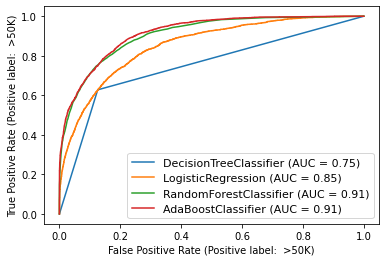

In [122]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

#lets find the roc curve to check best fitted model
disp=plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')


As per above observation we can see that RandomForest and AdaBoost classifier giving the best scores.

# K-Fold Cross Validation:

In [123]:
from sklearn.model_selection import KFold, cross_val_score

k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [125]:
print("Mean of Cross validation score for Random Forest model", "=>", cross_val_score(rf,x,y,cv=5).mean())
print("Mean of Cross validation score for AdaBoost model", "=>", cross_val_score(adb,x,y,cv=5).mean())

Mean of Cross validation score for Random Forest model => 0.8571867321867324
Mean of Cross validation score for AdaBoost model => 0.8588144963144962


# HyperParameter Tuning!

In [126]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10, 50, 100, 500]
grid['learning_rate']=[0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm']=['SAMME', 'SAMME.R']

grid_search=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
#execute the grid search
grid_result=grid_search.fit(x, y)
#summarize the best score and configuration
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.869810 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}


# Saving Model

In [127]:
adb=AdaBoostClassifier()
adb.fit(x,y)

AdaBoostClassifier()

In [128]:
import joblib

In [129]:
joblib.dump(adb, 'model_joblib_adb')

['model_joblib_adb']

In [130]:
model=joblib.load('model_joblib_adb')